In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.mlab import PCA
from sklearn.feature_selection import VarianceThreshold

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (16, 16)

## Метод пристального взгляда

Посмотрим на данные. Видно, что колонки разделены табуляцией, NaN'ы заменены на '-', 11 колонка категориальная, целочисленные колонки с NaN'ами приводятся к float64.

In [2]:
df = pd.read_csv('dataset_16', header=None, sep='\t', na_values='-', dtype={11: 'category'})
df[11] = df[11].cat.codes.astype(int)
print(df.dtypes)
df.head(10)

0       int64
1       int64
2     float64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14    float64
15      int64
16    float64
17    float64
dtype: object


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,10.0,43,5825543,69,60,0,1407606829,0,-24,0,0,1414776005,NaN,424668,NaN,3.0
1,2,1,334.0,129,31,112227,2,1,1415699671,0,-29,2,0,1386786500,86401.0,1274004,1.415715e+09,21.0
2,2,1,1.0,5,5825543,315,25219,1,1415428541,0,-26,2,0,1415612168,NaN,49380,NaN,16.0
3,1,1,422.0,2,5825543,392,44,1,1411245251,0,22,0,0,1379156172,NaN,19752,NaN,20.0
4,1,1,0.0,580,7699829,500,161068,1,1354122839,0,26,0,0,1415715882,3.0,5728080,1.415716e+09,18.0
5,2,1,368.0,3,3646724,278,1318768,1,1403527650,0,26,2,0,1383811681,NaN,29628,NaN,8.0
6,7,1,0.0,1,1906,211501,5,1,1410699768,0,26,4,0,1415676088,0.0,9876,NaN,7.0
7,1,1,1.0,5,7699829,387,101,1,1412281159,0,10,0,0,1415557048,NaN,49380,NaN,21.0
8,3,1,1126.0,175,7699829,15196,1318768,1,1415720896,0,-29,1,0,1318333464,NaN,1728300,NaN,21.0
9,4,1,54.0,8,8537,26351,299,1,1411749250,0,17,5,0,1410973327,NaN,79008,NaN,18.0


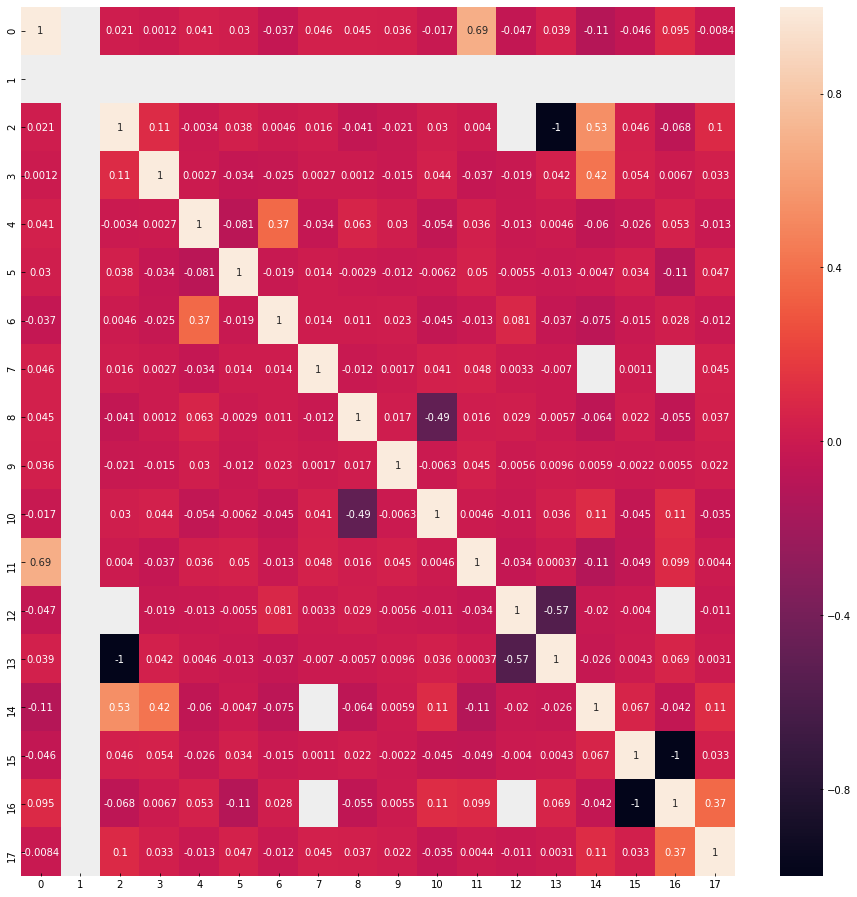

In [3]:
sns.heatmap(df.corr(), annot=True);

Видно, что 1ая колонка const=1, 2ая обратно коррелирует с 13ой, а 15ая с 16ой.

In [4]:
df[1].min(), df[1].max()

(1, 1)

Выкидываем.

In [5]:
df.drop([1, 13, 16], axis=1, inplace=True)
df.head()

,0,2,3,4,5,6,7,8,9,10,11,12,14,15,17
0,1,10.0,43,5825543,69,60,0,1407606829,0,-24,0,0,NaN,424668,3.0
1,2,334.0,129,31,112227,2,1,1415699671,0,-29,2,0,86401.0,1274004,21.0
2,2,1.0,5,5825543,315,25219,1,1415428541,0,-26,2,0,NaN,49380,16.0
3,1,422.0,2,5825543,392,44,1,1411245251,0,22,0,0,NaN,19752,20.0
4,1,0.0,580,7699829,500,161068,1,1354122839,0,26,0,0,3.0,5728080,18.0


Смотрим дальше.

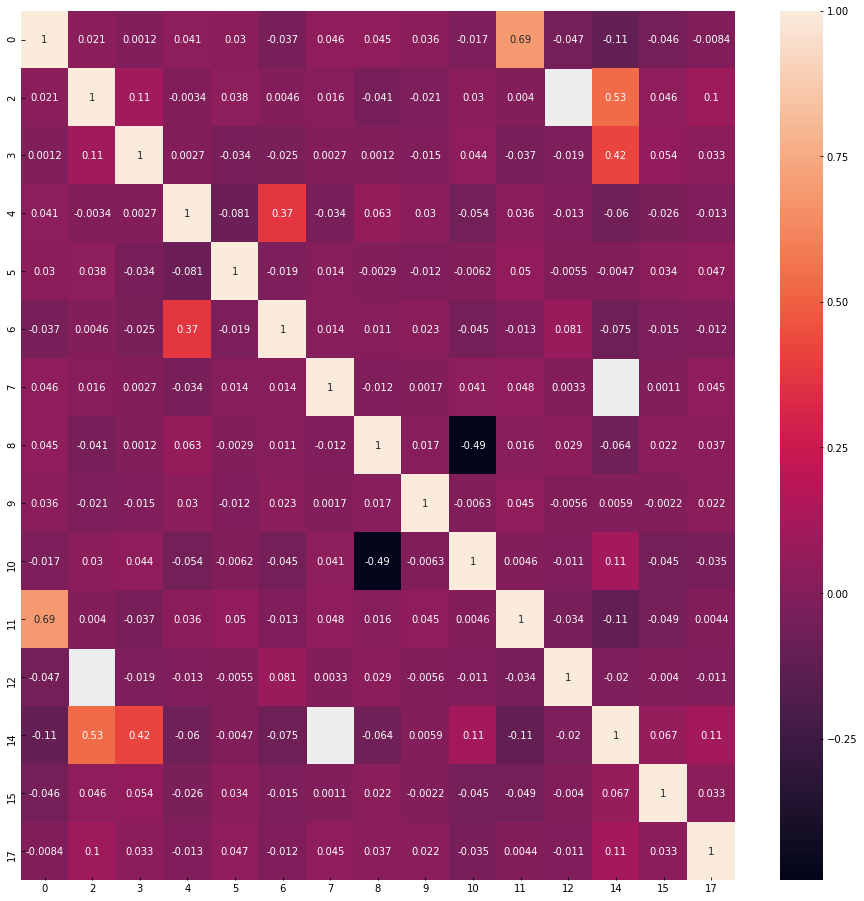

In [6]:
sns.heatmap(df.corr(), annot=True);

2 и 12, 7 и 14 колонки корреляции не имеют. Посмторим на них внимательнее.

In [7]:
df[[2, 7, 12, 14]].describe(include='all')

,2,7,12,14
count,967.000000,1000.000000,1000.000000,416.000000
mean,114.802482,0.999000,0.011000,40015.766827
std,214.396662,0.031623,0.104355,42944.008150
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,7.000000,1.000000,0.000000,6.000000
75%,132.000000,1.000000,0.000000,86401.000000
max,1706.000000,1.000000,1.000000,86401.000000


Если внимательно на них посмотреть, то окажется, что если у 12 стоит единичка, то у 2 стоит NaN (больше 12 интересно ни с кем не коррелирует, в 2 хорошо коррелирует с 14), а у 7 колонки только одна единичка в первой строке.

In [8]:
all(np.isnan(df[2][df[12] == 1]))

True

In [9]:
df[7][0], sum(df[7] != 0)

(0, 999)

Выкидываем 7 (не интересная колонка, почти константа) и 12.

In [10]:
df.drop([7, 12], axis=1, inplace=True)
df.head()

,0,2,3,4,5,6,8,9,10,11,14,15,17
0,1,10.0,43,5825543,69,60,1407606829,0,-24,0,NaN,424668,3.0
1,2,334.0,129,31,112227,2,1415699671,0,-29,2,86401.0,1274004,21.0
2,2,1.0,5,5825543,315,25219,1415428541,0,-26,2,NaN,49380,16.0
3,1,422.0,2,5825543,392,44,1411245251,0,22,0,NaN,19752,20.0
4,1,0.0,580,7699829,500,161068,1354122839,0,26,0,3.0,5728080,18.0


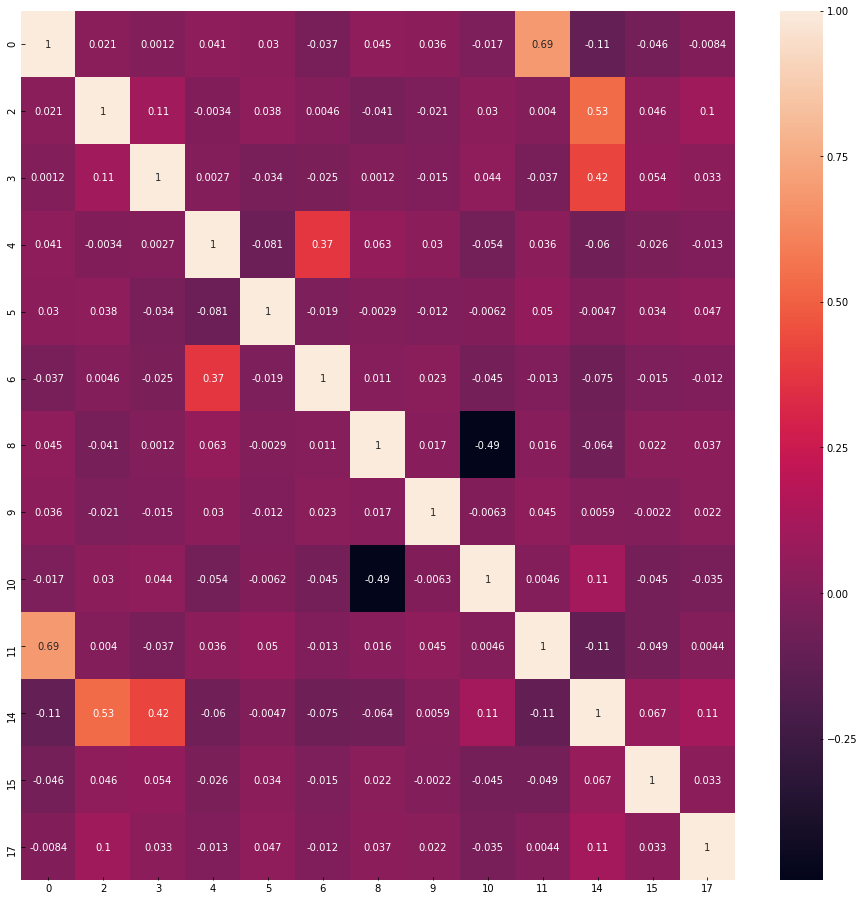

In [11]:
sns.heatmap(df.corr(), annot=True);

In [12]:
df.describe(include='all')

,0,2,3,4,5,6,8,9,10,11,14,15,17
count,1000.000000,967.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,416.000000,1.000000e+03,999.000000
mean,3.998000,114.802482,57.329000,2.554041e+06,22413.136000,1.775337e+05,1.397660e+09,0.174000,5.785000,3.007000,40015.766827,1.980401e+06,13.723724
std,2.052854,214.396662,167.270135,3.007527e+06,52024.852392,3.938943e+05,2.574589e+07,3.275737,22.871333,1.994726,42944.008150,4.478099e+07,7.568111
min,1.000000,0.000000,1.000000,3.000000e+00,1.000000,1.000000e+00,1.240921e+09,0.000000,-29.000000,0.000000,0.000000,9.876000e+03,0.000000
25%,2.000000,0.000000,1.000000,4.862525e+04,285.750000,1.475000e+01,1.390472e+09,0.000000,-20.000000,1.000000,0.000000,9.876000e+03,8.000000
50%,4.000000,7.000000,5.000000,6.236180e+05,459.500000,6.400000e+02,1.409275e+09,0.000000,21.000000,3.000000,6.000000,4.938000e+04,16.000000
75%,6.000000,132.000000,32.000000,5.825543e+06,8010.000000,5.009925e+04,1.414825e+09,0.000000,26.000000,5.000000,86401.000000,3.160320e+05,20.000000
max,7.000000,1706.000000,2086.000000,7.699829e+06,366755.000000,1.366483e+06,1.415738e+09,83.000000,26.000000,6.000000,86401.000000,1.415701e+09,23.000000


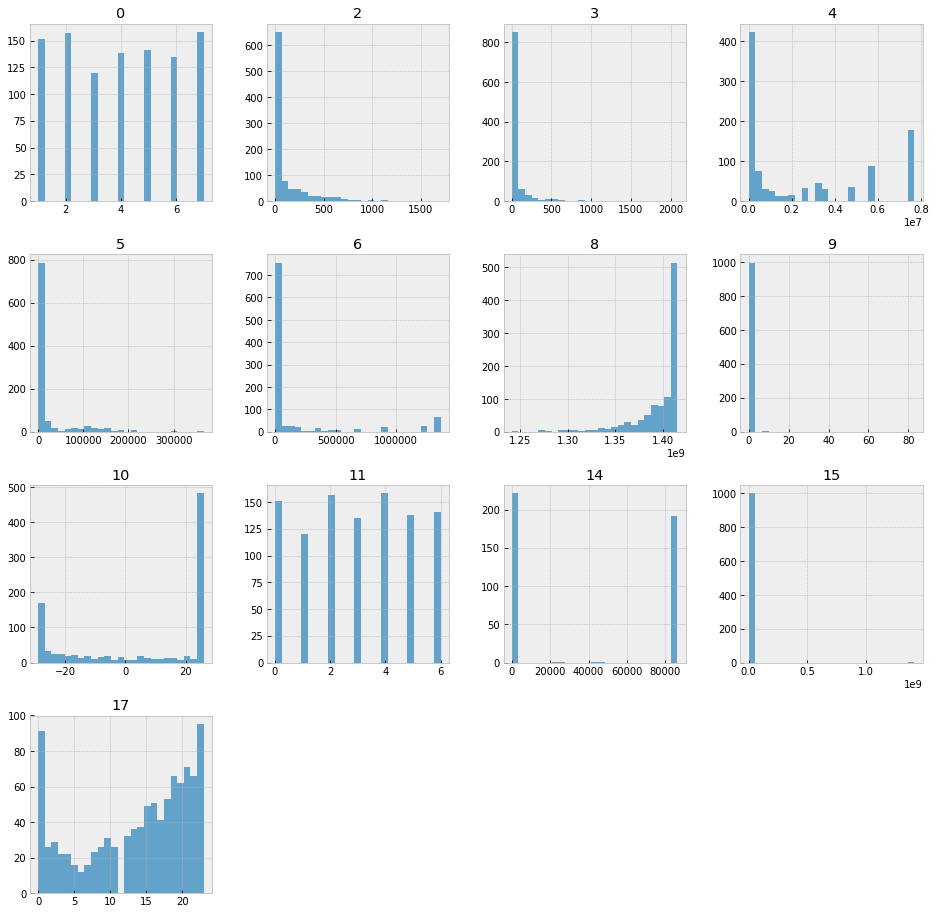

In [13]:
df.hist(alpha=0.75, bins=25);

## PCA

In [14]:
pca1 = PCA(df.fillna(0))
print(pca1.fracs)  # Explained variance
pd.DataFrame(pca1.Wt.T)  # Correlation

[ 0.13508665  0.123738    0.11501149  0.10401076  0.08289415  0.07946014
  0.0764956   0.0680794   0.06464367  0.04788633  0.04056819  0.03837494
  0.02375067]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.570877,0.400507,-0.032041,-0.004919,0.090515,-0.004459,-0.040503,-0.039348,-0.037535,-0.014675,0.054521,-0.003893,-0.704720
1,-0.165593,0.328129,-0.236705,-0.048212,-0.310852,-0.188413,-0.042390,-0.452519,0.621922,0.078284,0.261529,-0.071276,0.038279
2,-0.269843,0.375108,-0.350435,-0.054422,0.193840,0.146391,-0.002275,0.412021,-0.238967,0.087476,0.600587,-0.040450,0.069592
3,0.143161,-0.165729,-0.254124,-0.608700,-0.019473,-0.073265,-0.042308,0.005501,-0.066135,0.687448,-0.135766,0.117209,0.015731
4,0.057980,0.056392,0.058622,0.200684,-0.419197,-0.635618,0.045111,0.589126,0.066192,0.112163,-0.057056,0.016097,-0.020720
5,0.072063,-0.200495,-0.206017,-0.611849,-0.106822,-0.206772,-0.026022,0.085305,-0.023556,-0.669895,0.091691,-0.129495,-0.034597
6,0.204055,-0.271699,-0.527337,0.305892,0.042041,0.084792,-0.035889,0.063220,0.074649,0.074077,-0.126504,-0.686277,0.024611
7,0.092501,-0.006760,-0.024415,-0.070865,-0.086864,0.213239,0.946291,0.095140,0.167099,0.000455,0.007780,0.014166,-0.007896
8,-0.198833,0.320696,0.505258,-0.298998,-0.016742,-0.009749,0.040567,0.008669,-0.097722,0.125230,-0.122361,-0.685984,-0.007681
9,0.574723,0.395218,0.001212,-0.024103,0.058233,-0.025961,-0.024350,-0.030698,-0.058800,-0.087624,-0.071758,0.024036,0.700322


Будем считать, что хорошая дисперсия это >.08. Тогда нам интересны первые 5 собственых векторов. Они коррелируют с 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11. Т.е. можно дропнуть колонки под номерами 7 и 12 (9 и 17 в исходном). Это операция довольно условна, можно взять другие пороги и получить другие результаты.

In [15]:
df.drop([9, 17], axis=1, inplace=True)
df.head()

,0,2,3,4,5,6,8,10,11,14,15
0,1,10.0,43,5825543,69,60,1407606829,-24,0,NaN,424668
1,2,334.0,129,31,112227,2,1415699671,-29,2,86401.0,1274004
2,2,1.0,5,5825543,315,25219,1415428541,-26,2,NaN,49380
3,1,422.0,2,5825543,392,44,1411245251,22,0,NaN,19752
4,1,0.0,580,7699829,500,161068,1354122839,26,0,3.0,5728080


Сохраним обработанные данные.

In [16]:
df.to_hdf('dataset_16_clean.h5', 'df', mode='w', format='t', complevel=9)
!du -sh dataset_16_clean.h5

 40K	dataset_16_clean.h5
